# JV.com, decadence of a forum 🫠

👩‍🏫 Pitch project slides:
- https://docs.google.com/presentation/d/1kKAKUemoNtYhaEsTop-NjxxqC3LkP2vkuJZ62rXMOQU/edit?usp=sharing

🎯 Goal:
- Study **evolution** of hate speech, especially **sexism**, from forum posts

💡 Techniques used:
- **Scraping** : BeautifulSoup
- **LDA** (Latent Dirichlet Allocation) 
  https://kitt.lewagon.com/camps/1035/challenges?path=05-ML%2F10-Natural-Language-Processing%2F04-LDA
- **NLP, Word2vec, CNNs**
  https://kitt.lewagon.com/camps/1035/challenges?path=06-Deep-Learning%2F05-Natural-Language-Processing%2F02-Embeddings-with-Word2vec
- **Data Viz**

> ❗❗ **IMPORTANT DISCLAIMER** ❗❗
> 
> ❗❗ **This Notebook may content strong / sexual / sexist / racist language** ❗❗

## Introduction to "jeuxvideo.com"

### Some context

🕹️ https://www.jeuxvideo.com/

🔎 https://fr.wikipedia.org/wiki/Jeuxvideo.com

Today, jeuxvideo.com is the **most visited video-game website in France**. It talks about news related to video games, but also pop culture in general. In 2021, it changed its name to "JV.com".

💀 The comments sections below the articles and some **website forums** are well-known for their hatred and intolerance. Some cyberbullying campaigns have found their origin on these forums: 

> Back in 2017 two feminist activists, Clara Gonzales and Elliot Lepers, created a phone number "Antirelous" to tackle sexual harassment. Unfortunately, the number had been saturated with fake queries, coming from members of jeuxvideo.com **subforum Blabla 18-25 ans**. Eventually, the Antirelous number was shut down. French journalist Nadia Daam, annoyed by the situation, described the forum as "internet garbage". She and her daughter received death/rape threats from members of the forum... some have been convicted in court.

### Forum Structure

#### Blabla 18-25 homepage

> URL of BLabla 18-25 forum :
>
> https://www.jeuxvideo.com/forums/0-51-0-1-0-1-0-blabla-18-25-ans.htm

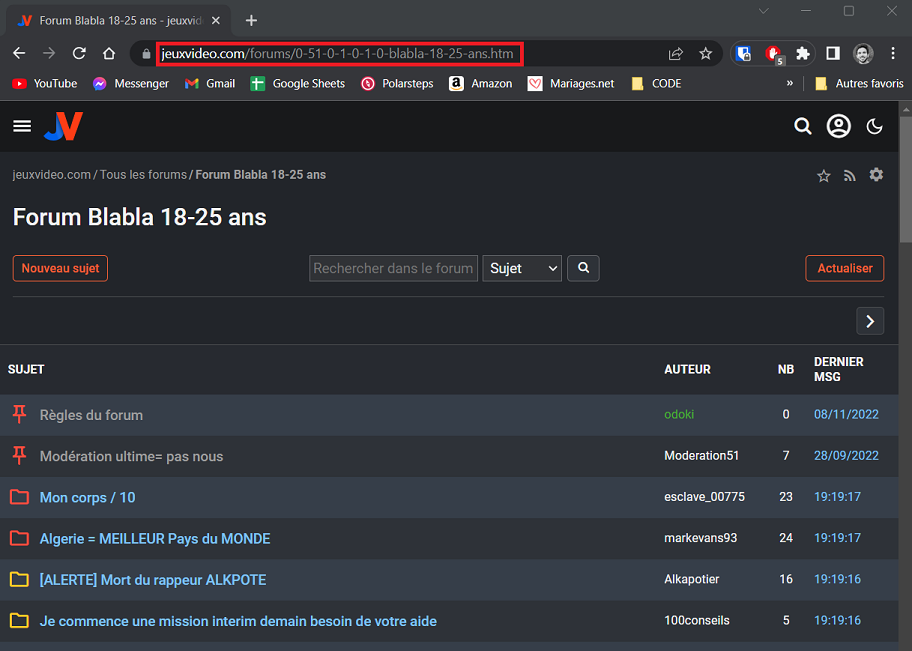

✒️ **VOCABULARY**
- **TOPIC** = Subject. Here on the picture we can see the first 6 topics. The 1st and 2nd topics are pinned. You cannot post in it anymore. They're usually here to show important info about the forum. Red folder image means that a topic has more than 20 posts. 
- **POST** = in a subject, each member can write a "post". It contains his/her username, the date, and his/her message. You can see some posts in the picture in the next section.

Before checking a topic and its related posts, let's take a look at the URL structure:

> https://www.jeuxvideo.com/forums/0-51-0-1-0-1-0-blabla-18-25-ans.htm

💡 You can go back to topics created in **2008** by changing only **one value** in the URL, the second *1* after *51*:

> https://www.jeuxvideo.com/forums/0-51-0-1-0-11650001-0-blabla-18-25-ans.htm

❗ This value is **NOT** related to a page, but to a **number of topics**.

Each page displays 25 topics. So the default *1* in the URL means that the page will display the topics 1 to 25.

If you want to go to page 2, you will have to change the value *1* by *26*. It will displays topics 26 to 51 (= 25 topics).

More generally, you would navigate by changing the value by:
> 25 * {page} + 1

So in the example, writing *11650001* sends you to page **(11650001 - 1) / 25 = 466000**. 

The first topic displayed on the page is the 11650001st.

#### Topic page

Now, let's take a look at one topic:
 
> https://www.jeuxvideo.com/forums/42-51-71221661-1-0-1-0-un-film-a-me-conseiller.htm

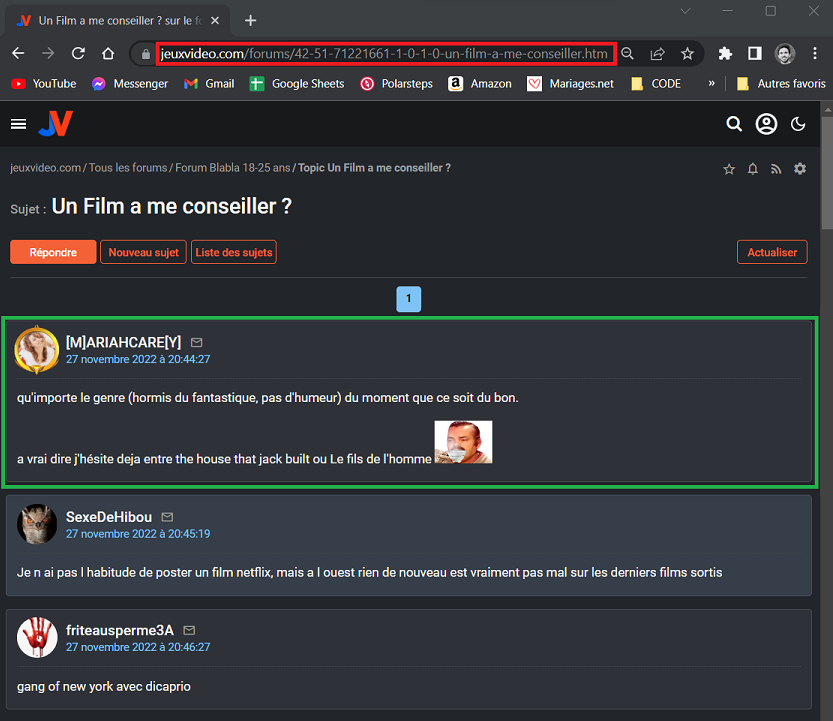

💡 Notice the URL structure. 

> **#71221661** is the **topic ID** (different from *number of topics* that we previously saw). I think it is attributed to a topic when it is created.
>
> We are here at **page 1**. If we would like to go to next pages (assuming they are existing), we would have to change the value *1* right after the topic ID by the page number we want.

💡 Notice the post structure (green box).

> It consists of:
> - member **username**: [M]ARIAHCARE[Y]
> - message **date and time**: Le 27 Novembre 2022 à 20:44:27
> - **message**. Here the message is split in two paragraphs in the page code. We will want to regroup them when scraping.

No comments on the other members usernames... 🙄

## Let's work!

### Imports

In [6]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import babel.dates

### Scraping exemple from Le Wagon

👌 If you would like to start slow and analyze steps from the example in Le Wagon lesson. 

Otherwise skip this part.

In [7]:
response_example = requests.get("https://www.imdb.com/list/ls055386972/", headers={"Accept-Language":"en-US"})
soup_example = BeautifulSoup(response_example.content, "html.parser")

In [8]:
movies = []
for movie in soup_example.find_all("div", class_="lister-item-content"):
    title = movie.find("h3").find("a").string
    duration = int(movie.find(class_="runtime").string.strip(' min'))
    year = int(re.search(r"\d{4}", movie.find(class_="lister-item-year").string).group(0))
    movies.append({'title': title, 'duration': duration, 'year': year})
print(movies[0])

{'title': 'The Godfather', 'duration': 175, 'year': 1972}


In [9]:
movies_df = pd.DataFrame(movies)
movies_df.head()

,title,duration,year
0,The Godfather,175,1972
1,Schindler's List,195,1993
2,12 Angry Men,96,1957
3,Life Is Beautiful,116,1997
4,"The Good, the Bad and the Ugly",178,1966


In [10]:
soup_example.find_all("div", class_="lister-item-content")
#len 50 movies

[<div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0068646/">The Godfather</a>
 <span class="lister-item-year text-muted unbold">(1972)</span>
 </h3>
 <p class="text-muted text-small">
 <span class="certificate">R</span>
 <span class="ghost">|</span>
 <span class="runtime">175 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Crime, Drama            </span>
 </p>
 <div class="ipl-rating-widget">
 <div class="ipl-rating-star small">
 <span class="ipl-rating-star__star">
 <svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 </span>
 <span class="ipl-rating-star__rating">9.2</span>
 </div>
 <div cla

In [11]:
soup_example.find_all("div", class_="lister-item-content")[0].find("h3").select('span[class*="lister-item"]')

[<span class="lister-item-index unbold text-primary">1.</span>,
 <span class="lister-item-year text-muted unbold">(1972)</span>]

In [12]:
soup_example.find_all("div", class_="lister-item-content")[0].find("h3").find_all("a")

[<a href="/title/tt0068646/">The Godfather</a>]

### Ideas for scraping technique

- https://stackoverflow.com/questions/42557071/web-scraping-every-forum-post-python-beautifulsoup
- https://www.dataquest.io/blog/how-i-scraped-over-25000-forum-posts-in-3-steps/

### Scrap topic URLs from topic list

🎯 First, we would like to get a list of topics URLs. Below is the function that does that. 

Its argument will set how far (i.e. until which page) the function will search for topics URLs.

In [13]:
def get_topic_urls(topic_page_max):
    '''
    Returns a list with all topic URLs
    Number of URLs returned = topic_page_max * 25
    Carefull, can take some time to run, even with 'only' topic_page_max = 100
    '''
    
    list_topic_urls = []
    
    for page in range(topic_page_max):
        
        #Each URL_topic_page lists 25 topics.
        url_topic_page = f'https://www.jeuxvideo.com/forums/0-51-0-1-0-{25*page+1}-0-blabla-18-25-ans.htm'
        response = requests.get(url_topic_page)
        soup = BeautifulSoup(response.content, "html.parser")
    
        for link in soup.find_all("a", class_="lien-jv topic-title stretched-link"):
            list_topic_urls.append(''.join(('https://www.jeuxvideo.com/',link.get('href'))))
    
    return list_topic_urls

In [9]:
topic_urls = get_topic_urls(topic_page_max=3)

In [10]:
len(topic_urls)

75

### Scraping first page from one topic

In [11]:
url_topic = topic_urls[14]

response = requests.get(url_topic)
soup = BeautifulSoup(response.content, "html.parser")

In [12]:
def scrap_first_page(soup):
    
    df = []
    
    for post in soup.find_all("div", class_="conteneur-message"):
        
        # Scrap username 
        username = post.select_one('span[class*="bloc-pseudo-msg text-user"]').text.replace('\n', '').strip()
        
        # Scrap date of message
        date = post.select_one('span[class*="lien-jv"]').text
        
        # Scrap the message (join different paragraphs among 1 message)
        full_message = []
        for paraph in post.find_all("p"):
            full_message.append(paraph.find(text=True))
        full_message = ' '.join(full_message)
        
        # Scrap topic
        topic = soup.find(id='bloc-title-forum').string
        
        # Create dataframe with info scraped
        df.append({'username': username, 'date': date, 'message': full_message, 'topic': topic})
        
    return pd.DataFrame(df)

In [13]:
scrap_first_page(soup)
#Problems where the date is included in the message

,username,date,message,topic
0,JaimeMaGuitare,27 novembre 2022 à 21:13:55,Pourquoi on me manque de respect comme ça putain.,Je le déteste
1,JaimeMaGuitare,27 novembre 2022 à 21:14:50,Moi je parle pas de la grosse bite de CHARLY o...,Je le déteste
2,JaimeMaGuitare,27 novembre 2022 à 21:15:04,Putain ça me dépasse.,Je le déteste
3,BoulleDeBoulle,27 novembre 2022 à 21:15:26,J'ai rien fais,Je le déteste
4,JaimeMaGuitare,27 novembre 2022 à 21:15:45,Le ...,Je le déteste


In [14]:
# babel.dates.get_month_names( locale='fr')[1]

### (NOT NEEDED) Try to change topic name for URL

In [16]:
topic_name = "Mon frigo me terrorise"
topic_name.lower().replace(' ', '-')

'mon-frigo-me-terrorise'

In [17]:
topic_name_2 = "🏆⚽️ Coupe du Monde de la FIFA 2022, Qatar ⚽️🏆"
topic_name_2 = re.sub(",|.n|\s", "#", topic_name_2)
topic_name_2.lower().replace(' ', '-')

'🏆⚽️#coupe#du#m#de#de#la#fifa#2022##qatar#⚽️🏆'

In [18]:
topic_name_2 = "🏆⚽️ Coupe du Monde de la FIFA 2022, Qatar ⚽️🏆"

In [19]:
clean(topic_name_2, )

'🏆⚽ coupe du monde de la fifa 2022, qatar ⚽🏆'

STRUCTURE URL TOPIC :

In [20]:
"https://www.jeuxvideo.com/forums/42-51-69870713-1-0-1-0-cartoon-network-1999-2009-all.htm"

'https://www.jeuxvideo.com/forums/42-51-69870713-1-0-1-0-cartoon-network-1999-2009-all.htm'

"https://www.jeuxvideo.com/forums/?-51-topic_num-1-0-1-0-topic_name.htm"

<>,?;.:/!§%*+=&
+=* : remplacé par "-"
5000€ = 5000eur
1000$ = 1000
ponctuation/espace : remplacé par "-"
Remove accent
lowercase

## test lecture data scrapé

In [16]:
data2 = pd.read_csv("../interface/data.csv")

In [18]:
data2

,Unnamed: 0,username,date,message,topic
0,0,CheloursAPaldea,28 novembre 2022 à 14:55:10,"On y voit la courbe de température, de dioxyde...",Cette image FOUDROIE les climato--sceptiques
1,1,CheloursAPaldea,28 novembre 2022 à 14:55:28,Drôle de corrélation ne trouvez-vous pas ?,Cette image FOUDROIE les climato--sceptiques
2,2,CheloursAPaldea,28 novembre 2022 à 14:59:21,39 milliards de tonnes de CO2 émis par ans al...,Cette image FOUDROIE les climato--sceptiques
3,3,MyKneeGrows5,28 novembre 2022 à 15:00:58,"Mais non enfin, le réchauffement climatique es...",Cette image FOUDROIE les climato--sceptiques
4,4,CheloursAPaldea,28 novembre 2022 à 15:02:27,100% des grandes crises biologiques causées pa...,Cette image FOUDROIE les climato--sceptiques
...,...,...,...,...,...
56,56,Savon2Prison,28 novembre 2022 à 15:47:52,Le 28 novembre 2022 à 15:43:39 MikeBloomberg a...,Cette image FOUDROIE les climato--sceptiques
57,57,hom1247,28 novembre 2022 à 15:50:06,oups j'ai fait tomber ça,Cette image FOUDROIE les climato--sceptiques
58,58,CheloursAPaldea,28 novembre 2022 à 15:50:49,Le ...,Cette image FOUDROIE les climato--sceptiques
59,59,EmperorClaudius,28 novembre 2022 à 15:51:34,Le ...,Cette image FOUDROIE les climato--sceptiques
